In [1]:
%%time
import webio as wb
import requests
import aiohttp
import asyncio
import nest_asyncio
nest_asyncio.apply()

urls = ['005930', '137940', '080220', '356680']
target = [f'https://fchart.stock.naver.com/sise.nhn?timeframe=day&count=6000&requestType=0&symbol={url}' for url in urls]


CPU times: total: 62.5 ms
Wall time: 279 ms


In [5]:
%%time
results = asyncio.run(wb.asyn_get(target))

CPU times: total: 0 ns
Wall time: 129 ms


In [6]:
%%time
results = wb.get(target)

CPU times: total: 812 ms
Wall time: 1.41 s


In [7]:
import naver
import FinanceDataReader as fdr
import nest_asyncio
import asyncio

urls = ['005930', '137940', '417200', '024900', '273060']
url_str = '005930,137940,417200,024900,273060'

In [8]:
ddf = naver.NaverDataReader(urls)

In [9]:
%%time

result = asyncio.run(ddf.run())
result

CPU times: total: 78.1 ms
Wall time: 245 ms


,Date,Open,High,Low,Close,Volume,Ticker
npartitions=5,,,,,,,
,datetime64[ns],int64,int64,int64,int64,int64,object
,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...
,...,...,...,...,...,...,...


In [10]:
%%time

fdr.DataReader(url_str)

CPU times: total: 906 ms
Wall time: 1.92 s


,005930,137940,417200,024900,273060
Date,,,,,
1999-08-30,4340,NaN,NaN,3400,NaN
1999-08-31,4480,NaN,NaN,3490,NaN
1999-09-01,4370,NaN,NaN,3370,NaN
1999-09-02,4500,NaN,NaN,3215,NaN
1999-09-03,4820,NaN,NaN,3400,NaN
...,...,...,...,...,...
2023-12-11,73000,735.0,NaN,4990,1153.0
2023-12-12,73500,955.0,24000.0,5020,1132.0
2023-12-13,72800,835.0,31200.0,4955,1106.0


In [4]:
import yahoo
import asyncio
import nest_asyncio
import FinanceDataReader as fdr
nest_asyncio.apply()

urls = ['AAPL', 'SOXL', 'MRNA', 'JPY=X']
url_str = 'AAPL,SOXL,MRNA,JPY=X'
ddf = yahoo.YahooDailyReader(urls, start='2020-12-01', end='2023-12-01')

In [5]:
%%time

results = asyncio.run(ddf.run())
results

CPU times: total: 46.9 ms
Wall time: 738 ms


In [6]:
%%time

fdr.DataReader(url_str)

CPU times: total: 984 ms
Wall time: 4.99 s


,AAPL,SOXL,MRNA,JPY=X
Date,,,,
1980-12-12,0.099319,NaN,NaN,NaN
1980-12-15,0.094137,NaN,NaN,NaN
1980-12-16,0.087228,NaN,NaN,NaN
1980-12-17,0.089387,NaN,NaN,NaN
1980-12-18,0.091978,NaN,NaN,NaN
...,...,...,...,...
2023-12-11,193.179993,26.110001,82.000000,144.983002
2023-12-12,194.710007,26.650000,78.040001,146.085007
2023-12-13,197.960007,27.920000,78.599998,145.279999


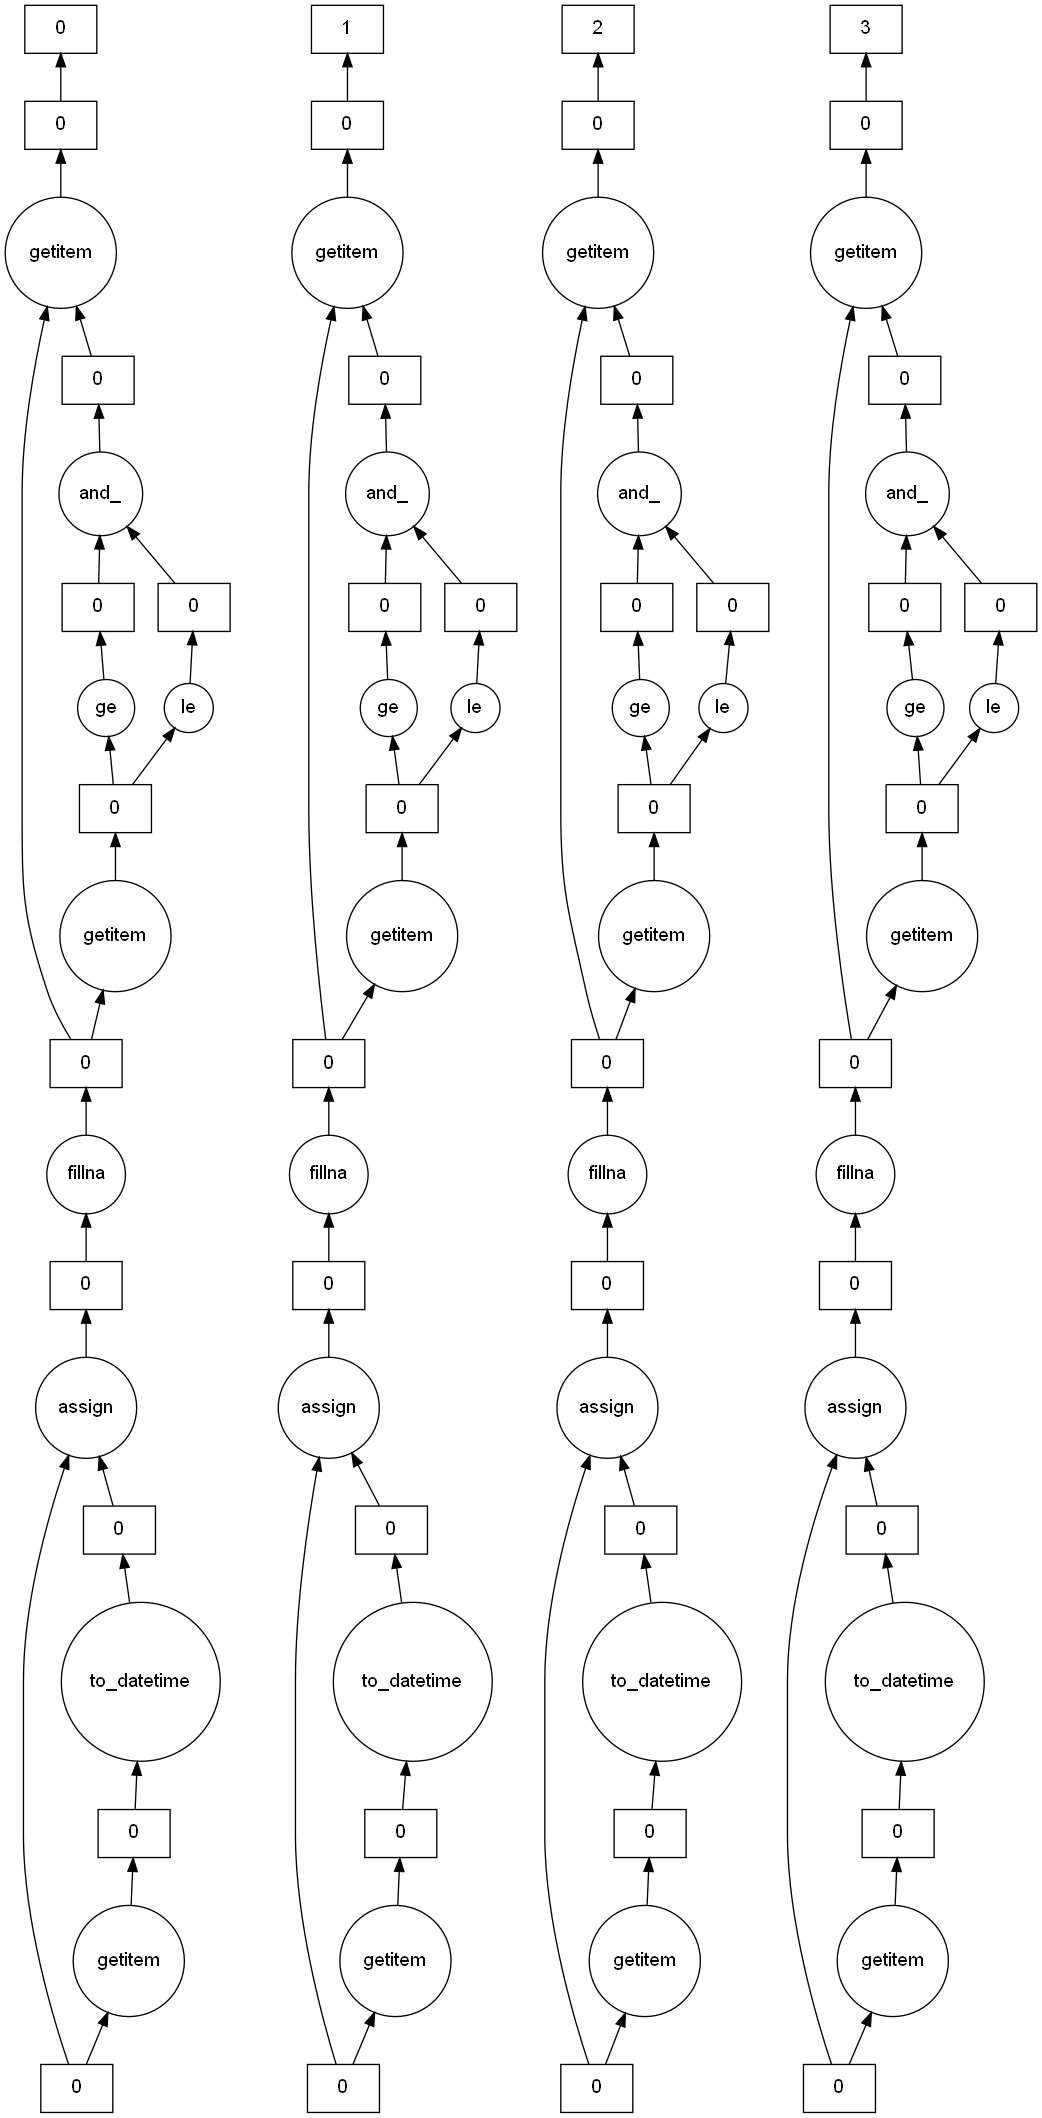

In [8]:
results.visualize()